In [1]:
import nibabel as nib
import pandas as pd
import numpy as np
from os.path import join, dirname, isdir, isfile, basename
from glob import glob

import seaborn as sns
sns.set_style("white")
sns.set_context("poster",font_scale=0.5)
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Set waring to 'ignore' to prevent them from prining on screen
import warnings
warnings.filterwarnings('ignore')

In [2]:
Pessoa_Lab = '/data/bswift-1/Pessoa_Lab'
eCON = join(Pessoa_Lab,'eCON')

In [3]:
yoked = pd.read_excel(join(eCON,'onsetdir/CON_yoked_table.xlsx'))
yoked = yoked.query('use == 1').reset_index()

In [4]:
rois = pd.read_csv(join(eCON,'ROI_masks/EmoproxII_ROIs_final/readme'),sep='\t',index_col='Index')['ROI'].to_dict()

In [5]:
rois

{1: 'L Amygdala (BLBM)',
 2: 'R Amygdala (BLBM)',
 3: 'L Amygdala (CeME)',
 4: 'R Amygdala (CeME)',
 5: 'L aMCC',
 6: 'R aMCC',
 7: 'L Thalamus (emoproxI shock intersection)',
 8: 'R Thalamus (emoproxI shock intersection)',
 9: 'L Anterior dorsal insula',
 10: 'R Anterior dorsal insula',
 11: 'L Mid posterior insula',
 12: 'R Mid posterior insula',
 13: 'L Anterior ventral insula (anterior pole)',
 14: 'R Anterior ventral insula (anterior pole)',
 15: 'vmPFC (new 5mm sphere from Hartley paper)',
 16: 'L BST',
 17: 'L Anterior hippocampus',
 18: 'L PAG',
 19: 'PCC (1)',
 20: 'PCC (2)',
 21: 'R BST',
 22: 'R Anterior hippocampus',
 23: 'R PAG',
 24: 'vmPFC (from out lab)'}

In [6]:
bucket = join(eCON,'dataset/results_ShockCensored/{subj}/{group}lable/splitted_regs/ROI_final/near_miss/noProx/{subj}_bucket_REML.1D')

In [7]:
main_df = pd.DataFrame()
for j,row in yoked.iterrows():
    #if j < 10:
    for group in ['control','uncontrol']:
        subj = row[group]
        #print('Processing {}....'.format(subj))
        data = np.loadtxt(bucket.format(subj=subj,group=group))
        beta = data[:,1::2][:,:21]
        tmp_df = pd.DataFrame(beta,index=rois.values()).T
        tmp_df['Pair'] = 'P{:02d}'.format(j)
        tmp_df['Group'] = group
        tmp_df['Subj'] = subj
        tmp_df['Time'] = np.arange(21)*1.25

        main_df = pd.concat([main_df,tmp_df],axis=0,ignore_index=True)
        
main_df = pd.melt(main_df,id_vars = ['Subj','Pair','Group','Time'],
                  value_vars = rois.values(),var_name = 'ROI', value_name='beta')

In [8]:
data.shape

(24, 51)

In [9]:
data[:,1::2].shape

(24, 25)

In [10]:
print(main_df.Subj.unique().size)

122


In [11]:
df = main_df.groupby(['Group', 'Time', 'ROI'])['beta'].mean().reset_index()
df.head()

,Group,Time,ROI,beta
0,control,0.0,L Amygdala (BLBM),-0.039884
1,control,0.0,L Amygdala (CeME),0.046815
2,control,0.0,L Anterior dorsal insula,-0.020753
3,control,0.0,L Anterior hippocampus,0.009222
4,control,0.0,L Anterior ventral insula (anterior pole),-0.025422


In [12]:
#main_df.to_csv('00c-near_misses.txt',sep=',',index=False)

0 L Amygdala (BLBM)
1 R Amygdala (BLBM)
2 L Amygdala (CeME)
3 R Amygdala (CeME)
4 L aMCC
5 R aMCC
6 L Thalamus (emoproxI shock intersection)
7 R Thalamus (emoproxI shock intersection)
8 L Anterior dorsal insula
9 R Anterior dorsal insula
10 L Mid posterior insula
11 R Mid posterior insula
12 L Anterior ventral insula (anterior pole)
13 R Anterior ventral insula (anterior pole)
14 vmPFC (new 5mm sphere from Hartley paper)
15 L BST
16 L Anterior hippocampus
17 L PAG
18 PCC (1)
19 PCC (2)
20 R BST
21 R Anterior hippocampus
22 R PAG
23 vmPFC (from out lab)


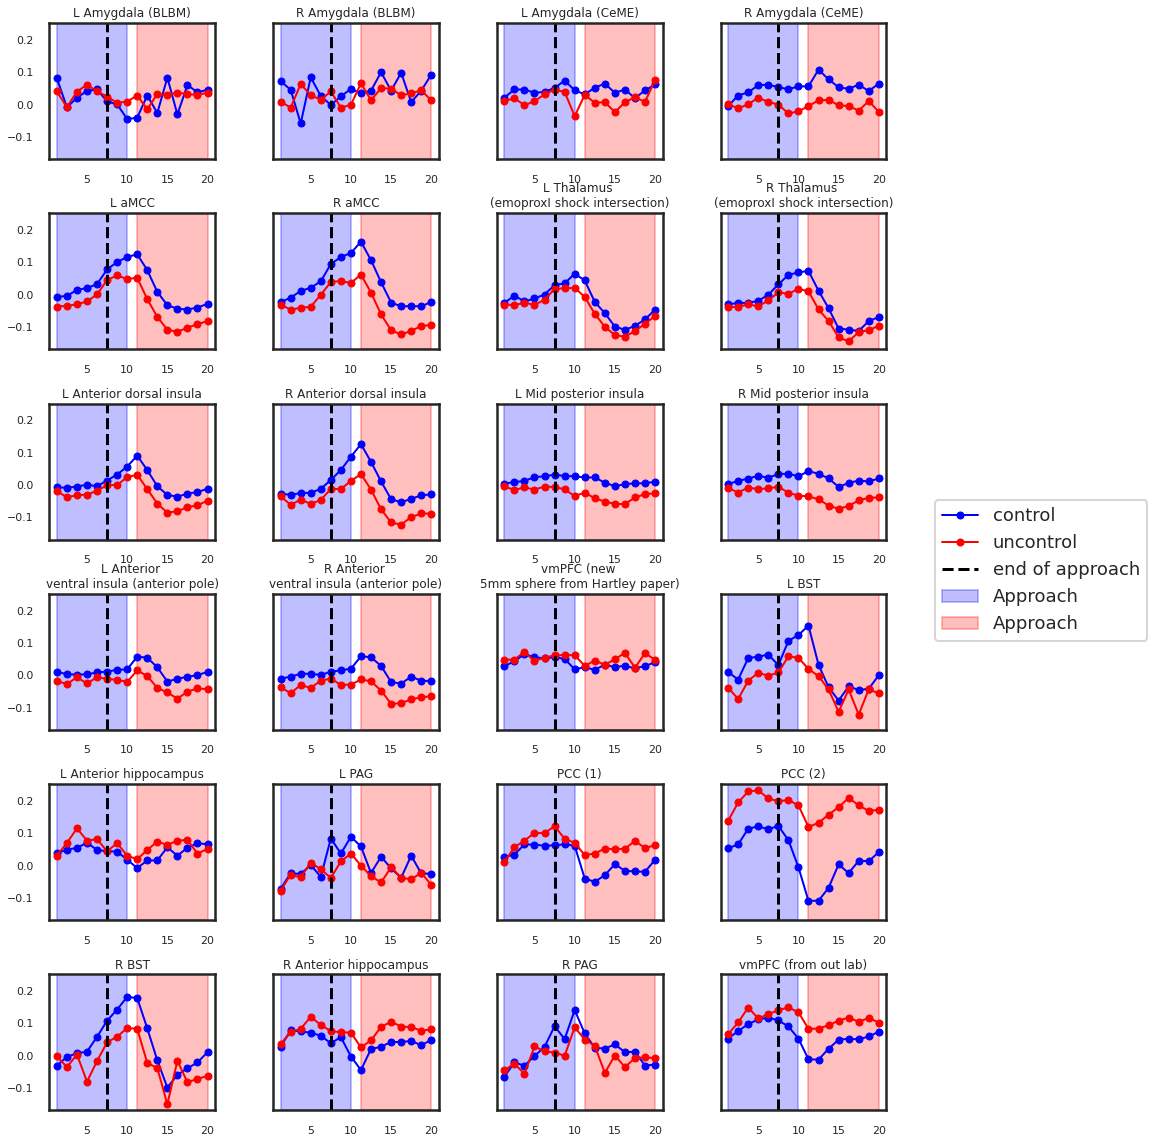

In [14]:
time = df['Time'].unique()

fig, axes = plt.subplots(ncols=4,nrows=6,figsize=(15,20),sharey=True)
axes = axes.flatten()
fig.subplots_adjust(hspace=0.4,wspace=0.35)
for ii, roi in enumerate(rois.values()):
    print(ii,roi)
    roi_df = df[df['ROI']==roi]
    
    con = roi_df[roi_df['Group']=='control']['beta']
    uncon = roi_df[roi_df['Group']=='uncontrol']['beta']
    axes[ii].plot(time[1:-4],con[1:-4],marker='o',label='control',color='blue',linewidth=2,markersize=7)
    axes[ii].plot(time[1:-4],uncon[1:-4],marker='o',label='uncontrol',color='red',linewidth=2,markersize=7)
    axes[ii].axvspan(xmin=1.25,xmax=10,color='blue',alpha=0.25,label='Approach')
    axes[ii].axvspan(xmin=11.25,xmax=20,color='red',alpha=0.25,label='Approach')
    axes[ii].axvline(x=7.5,color='k',linestyle='--',label='end of approach')
    
    if len(roi) > 24:
        axes[ii].set_title('\n'.join([roi[:11],roi[11:]]))
    else:
        axes[ii].set_title(roi)
fig.legend(axes[ii].get_legend_handles_labels()[0],
           labels=axes[ii].get_legend_handles_labels()[1],
           loc='center right',
           bbox_to_anchor=[1.15,0.5],
           fontsize=18)
#plt.savefig('nearmiss_resp_finalROIs.png',dpi=300)

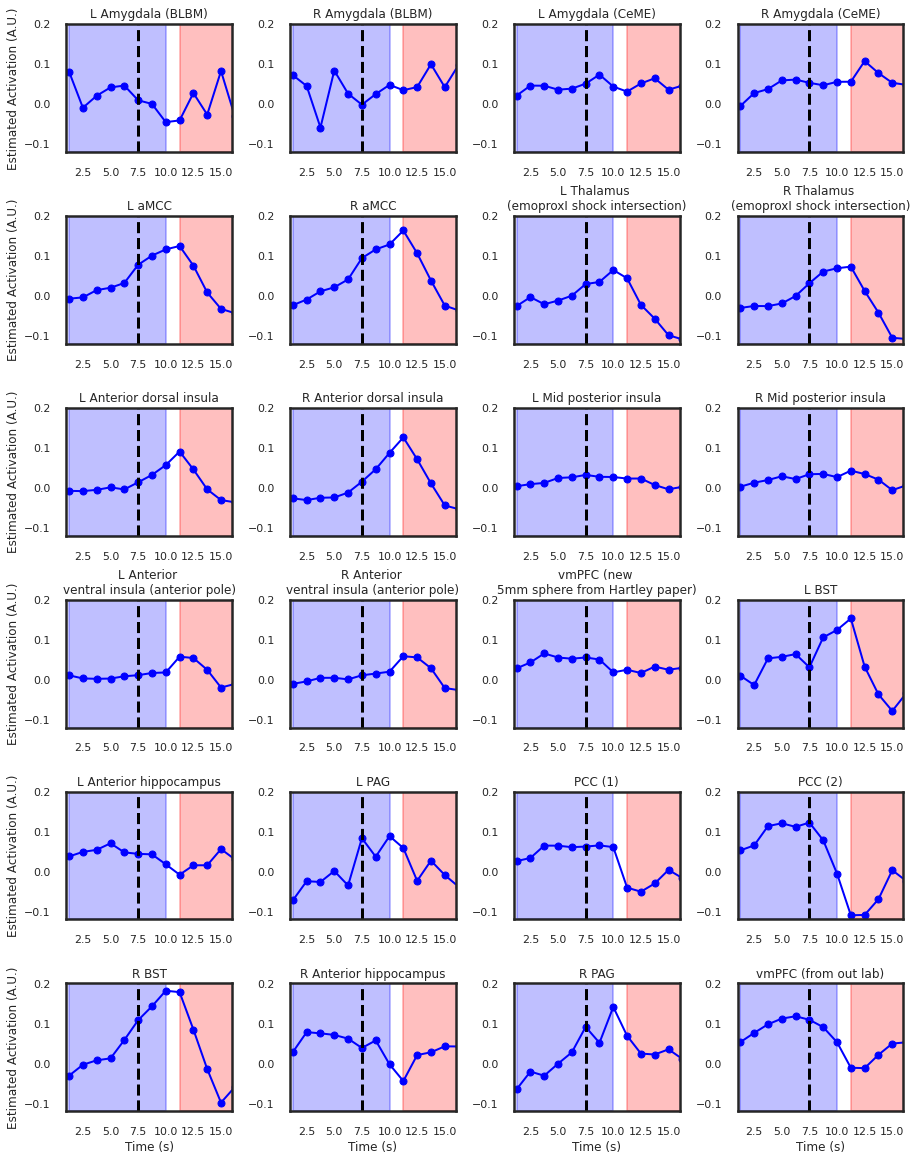

In [15]:
time = df['Time'].unique()

fig, axes = plt.subplots(ncols=4,nrows=6,figsize=(15,20),sharey=False)
axes = axes.flatten()
fig.subplots_adjust(hspace=0.5,wspace=0.35)
for ii, roi in enumerate(rois.values()):
    roi_df = df[df['ROI']==roi]
    con = roi_df[roi_df['Group']=='control']['beta']
    uncon = roi_df[roi_df['Group']=='uncontrol']['beta']
    axes[ii].plot(time[1:-4],con[1:-4],marker='o',label='control',color='blue',linewidth=2,markersize=7)
    axes[ii].axvspan(xmin=1.25,xmax=10,color='blue',alpha=0.25,label='Approach')
    axes[ii].axvspan(xmin=11.25,xmax=20,color='red',alpha=0.25,label='Approach')
    axes[ii].axvline(x=7.5,color='k',linestyle='--',label='end of approach')
    axes[ii].set_xticks(time[::2])
    axes[ii].set_xlim(1.0,16)
    axes[ii].set_ylim(-0.12,0.2)
    
    if len(roi) > 24:
        axes[ii].set_title('\n'.join([roi[:11],roi[11:]]))
    else:
        axes[ii].set_title(roi)
        
    if ii % 4 == 0:
        axes[ii].set_ylabel('Estimated Activation (A.U.)')
    
    if ii > 19: 
        axes[ii].set_xlabel('Time (s)')
#fig.legend(axes[ii].get_legend_handles_labels()[0],
#           labels=axes[ii].get_legend_handles_labels()[1],
#           loc='center right',
#           bbox_to_anchor=[1.05,0.5],
#           fontsize=18)
plt.savefig('nearmiss_resp_finalROIs_control.png',dpi=300)

In [16]:
def procBase(bucket):
    name = basename(bucket).split('_')[0]
    if name == 'con':
        return 'Controllable'
    else:
        return 'Uncontrollable'

In [18]:
def direction(tr):
    direction = None
    if tr <= 6:
        direction = 'Approach'
    elif tr > 6 and tr <= 13:
        direction = 'Retreat'
    return direction

def direction(tr):
    direction = None
    if tr <= 8:
        direction = 'Approach'
    elif tr > 8 and tr <= 17:
        direction = 'Retreat'
    return direction
df['Direction'] = df['TR'].apply(direction)

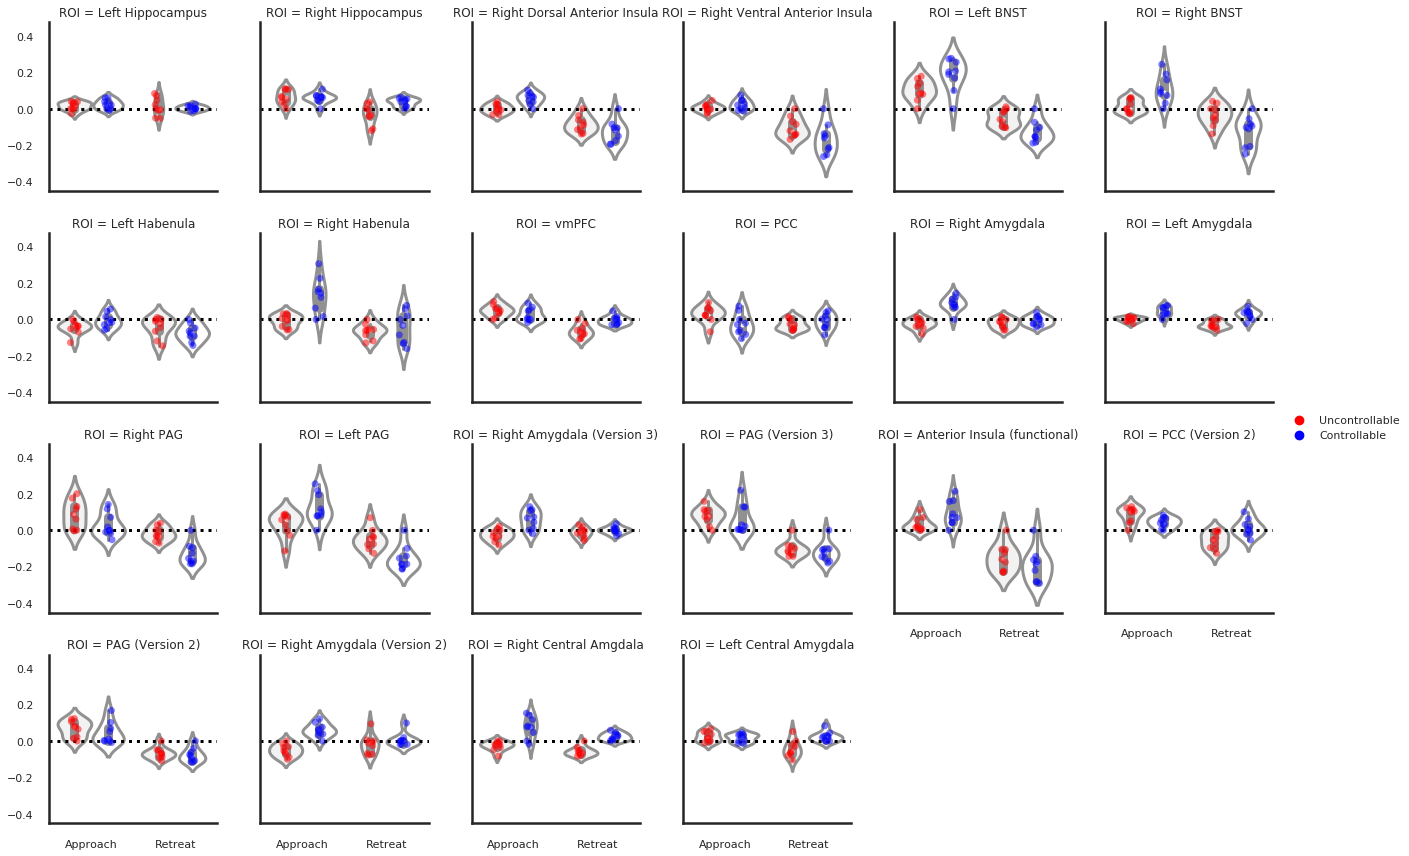

In [9]:
def stripplot(x,y,**kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    hue = kwargs.pop("hue")
    sns.violinplot(x,y,data=data,hue=hue,ax=ax,size=7,color='white')
    sns.stripplot(x,y,data=data,hue=hue,palette=['red','blue'],
                  hue_order=['Uncontrollable','Controllable'],
                  ax=ax,size=7,
                  edgecolor='black',
                  dodge=True,
                  alpha=0.5)
    ax.axhline(0,color='black',linestyle=':')

g = sns.FacetGrid(col='ROI',col_wrap=6,data=df)
g = (g.map_dataframe(stripplot,x='Direction',y='Deviation',hue='Group').add_legend())
#gmap.map_dataframe(stripplot,x='Direction',y='Deviation',hue='Group').add_legends()
plt.subplots_adjust(hspace=0.25)
plt.savefig('DeviationsFromOnset.png',dpi=300)

In [19]:
df.head(21)

,TR,ROI,Group,Time(s),Response,Deviation,Direction
0,0,Left Hippocampus,Uncontrollable,0.00,0.042108,0.000000,Approach
1,1,Left Hippocampus,Uncontrollable,1.25,0.015722,-0.026386,Approach
2,2,Left Hippocampus,Uncontrollable,2.50,0.057200,0.015092,Approach
3,3,Left Hippocampus,Uncontrollable,3.75,0.073065,0.030957,Approach
4,4,Left Hippocampus,Uncontrollable,5.00,0.080083,0.037975,Approach
5,5,Left Hippocampus,Uncontrollable,6.25,0.040522,-0.001586,Approach
6,6,Left Hippocampus,Uncontrollable,7.50,0.081747,0.039638,Approach
7,7,Left Hippocampus,Uncontrollable,8.75,0.072810,0.030702,Approach
8,8,Left Hippocampus,Uncontrollable,10.00,0.044498,0.002389,Approach
9,9,Left Hippocampus,Uncontrollable,11.25,0.055441,0.000000,Retreat


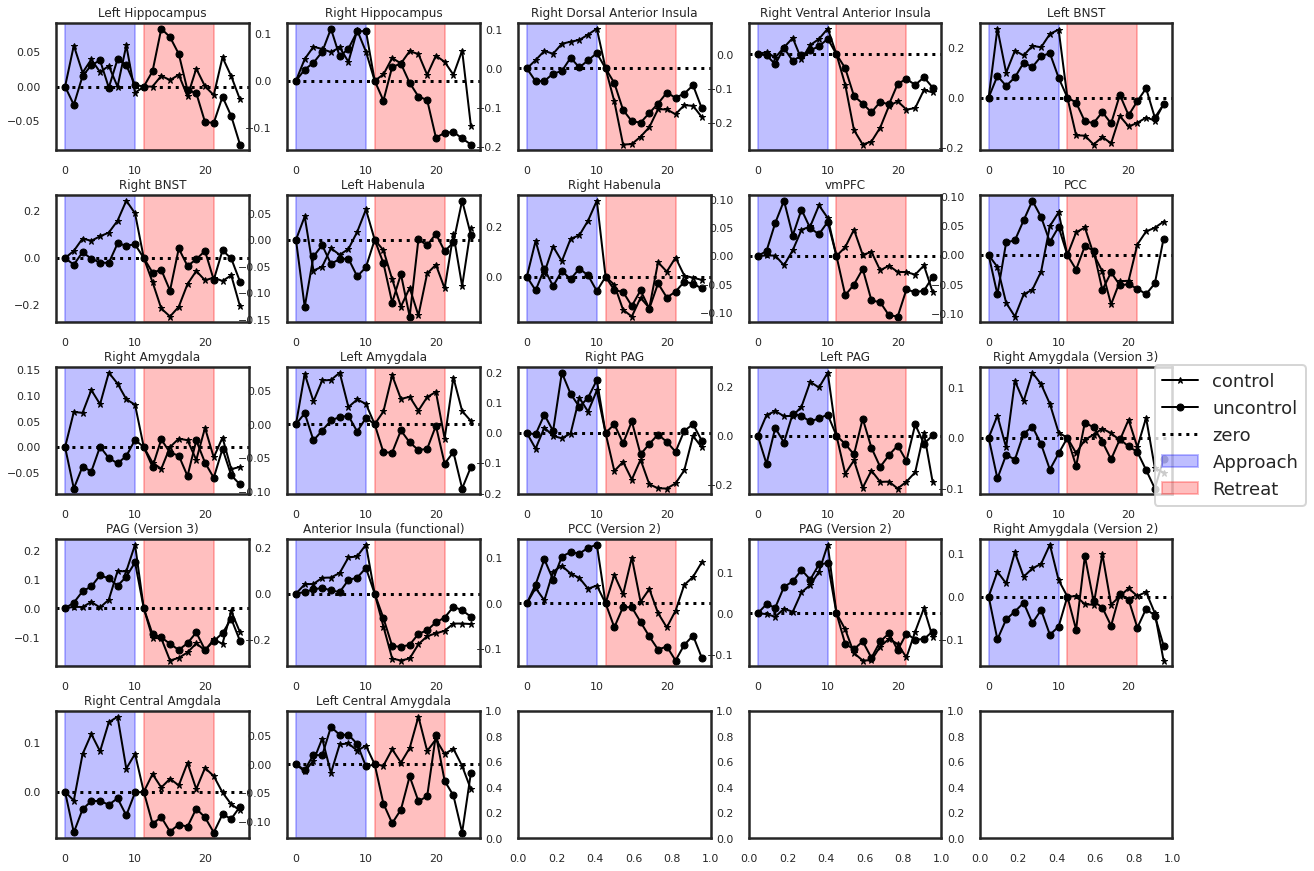

In [20]:
fig, axes = plt.subplots(ncols=5,nrows=5,figsize=(20,15))
axes = axes.flatten()
fig.subplots_adjust(hspace=0.35)
for ii, roi in enumerate(rois):
    roi_df = df[df['ROI']==roi]
    time = roi_df['Time(s)'].unique()
    con = roi_df[roi_df['Group']=='Controllable']['Deviation']
    uncon = roi_df[roi_df['Group']=='Uncontrollable']['Deviation']
    axes[ii].plot(time,con,marker='*',label='control',color='k',linewidth=2,markersize=7)
    axes[ii].plot(time,uncon,marker='o',label='uncontrol',color='k',linewidth=2,markersize=7)
    axes[ii].axvspan(xmin=0,xmax=time[8],color='blue',alpha=0.25,label='Approach')
    axes[ii].axvspan(xmin=time[9],xmax=time[17],color='red',alpha=0.25,label='Retreat')
    axes[ii].axhline(0,color='black',linestyle=':',label='zero')
    axes[ii].set_title(roi)
    
axes[ii].get_legend_handles_labels()[0].pop(3)
axes[ii].get_legend_handles_labels()[1].pop(3)
fig.legend(axes[ii].get_legend_handles_labels()[0],
           labels=axes[ii].get_legend_handles_labels()[1],
           loc='center right',
           #bbox_to_anchor=[1,1],
           fontsize=18)
plt.savefig('DeviationsFromOnset.png',dpi=300)

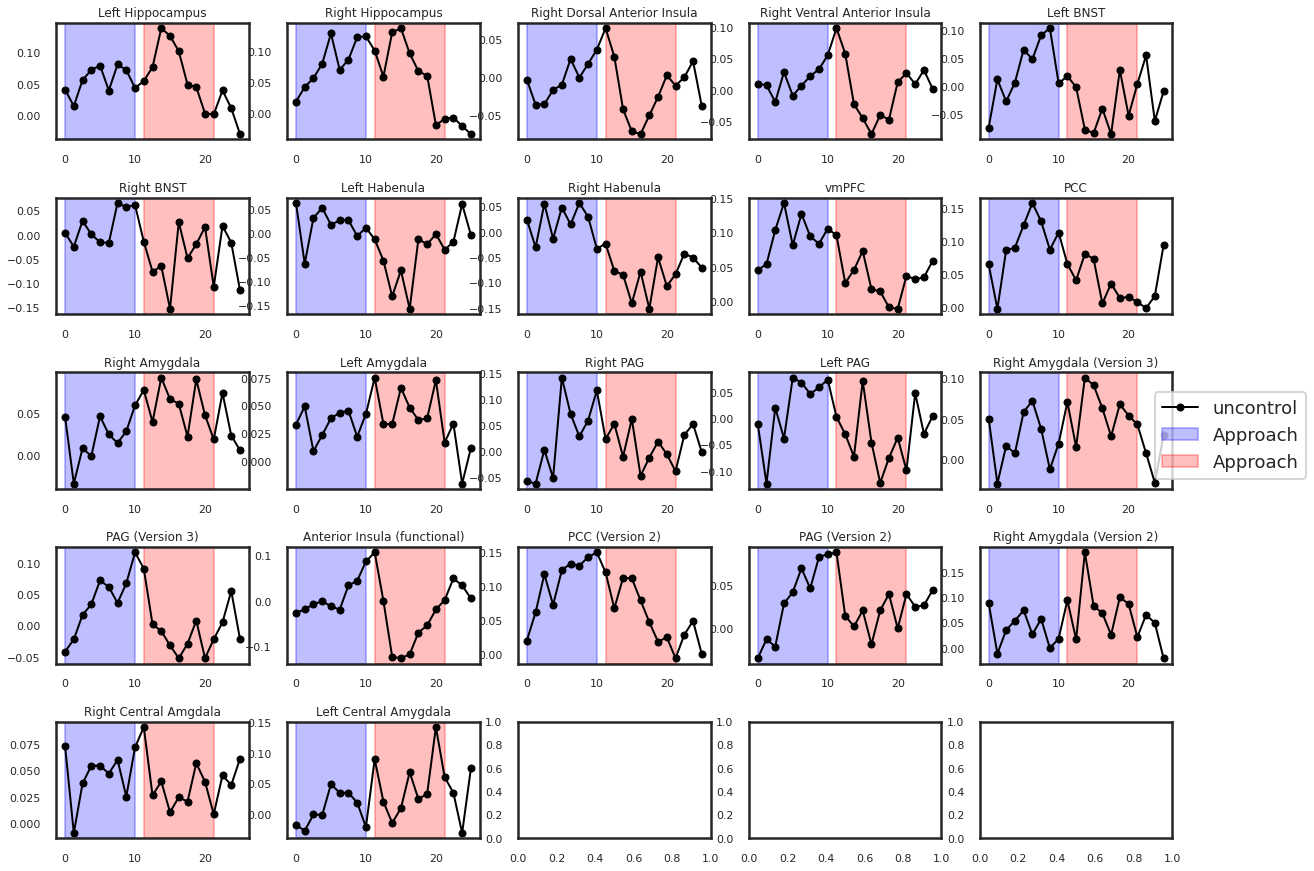

In [24]:
fig, axes = plt.subplots(ncols=5,nrows=5,figsize=(20,15))
axes = axes.flatten()
fig.subplots_adjust(hspace=0.5)
for ii, roi in enumerate(rois):
    roi_df = df[df['ROI']==roi]
    time = roi_df['Time(s)'].unique()
    con = roi_df[roi_df['Group']=='Controllable']['Response']
    uncon = roi_df[roi_df['Group']=='Uncontrollable']['Response']
    #axes[ii].plot(time,con,marker='*',label='control',color='k',linewidth=2,markersize=7)
    axes[ii].plot(time,uncon,marker='o',label='uncontrol',color='k',linewidth=2,markersize=7)
    axes[ii].axvspan(xmin=0,xmax=time[8],color='blue',alpha=0.25,label='Approach')
    axes[ii].axvspan(xmin=time[9],xmax=time[17],color='red',alpha=0.25,label='Approach')
    axes[ii].set_title(roi)
fig.legend(axes[ii].get_legend_handles_labels()[0],
           labels=axes[ii].get_legend_handles_labels()[1],
           loc='center right',
           #bbox_to_anchor=[1,1],
           fontsize=18)
plt.savefig('uncontrol_resp.png',dpi=300)